In [1]:
from sage.symbolic.integration.integral import definite_integral

phi0 = var('phi0')
phi1 = var('phi1')
theta0 = var('theta0')
theta1 = var('theta1')

theta = var('theta')
phi = var('phi')

nx, ny, nz = var('nx ny nz')

def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

def sphericalToCartesian(phi, theta):
    return (sin(theta)*cos(phi), cos(theta), sin(theta)*sin(phi))

result = definite_integral(definite_integral(sin(theta)*dot((nx, ny, nz), sphericalToCartesian(phi, theta)), theta, theta0, theta1), phi, phi0, phi1).simplify_full()
print(result)


-1/2*(ny*phi0 - ny*phi1)*cos(theta0)^2 + 1/2*(ny*phi0 - ny*phi1)*cos(theta1)^2 + 1/2*(nz*cos(phi0) - nz*cos(phi1) - nx*sin(phi0) + nx*sin(phi1))*cos(theta0)*sin(theta0) - 1/2*(nz*cos(phi0) - nz*cos(phi1) - nx*sin(phi0) + nx*sin(phi1))*cos(theta1)*sin(theta1) - 1/2*(nz*cos(phi0) - nz*cos(phi1) - nx*sin(phi0) + nx*sin(phi1))*theta0 + 1/2*(nz*cos(phi0) - nz*cos(phi1) - nx*sin(phi0) + nx*sin(phi1))*theta1


In [6]:
from sage.symbolic.integration.integral import definite_integral

wx = var('wx')
wy = var('wy')
wz = var('wz')
worldPos = (wx, wy, wz)

windowRad = 0.7
windowZ = -1

x = var('x')
y = var('y')

nx, ny, nz = var('nx ny nz')
normal = (nx, ny, nz)

phi, theta = var('phi theta')

def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

def cross(a, b):
    return (a[1]*b[2] - a[2]*b[1], a[2]*b[0] - a[0]*b[2], a[0]*b[1] - a[1]*b[0])

# print('cross: ' + str(cross((1, 0, 0),(0, 0, 1))))

def lenghtSq(v):
    return dot(v, v)

def lenght(v):
    return sqrt(lenghtSq(v))

def normalize(v):
    l = lenght(v);
    return (v[0]/l, v[1]/l, v[2]/l)

def sphericalToCartesian(phi, theta):
    return (sin(theta)*cos(phi), cos(theta), sin(theta)*sin(phi))

def transformSphericalToPlane(p, t):
    v = sphericalToCartesian(p, t)
    l = (windowZ - wz) / v[2]
    return (v[0]*l, v[1]*l)

assume(lenght(normal) == 1)
assume(wx >= -1)
assume(wx <= 1)
assume(wy >= -1)
assume(wy <= 1)
assume(wz > -1)
assume(wz <= 1)

print('test: ' + str(lenght(normal).is_positive()))

print('x = ' + str(transformSphericalToPlane(phi, theta)[0]))
print('y = ' + str(transformSphericalToPlane(phi, theta)[1]))

print('---')
J = ((derivative(transformSphericalToPlane(phi, theta)[0], phi).simplify_full(), derivative(transformSphericalToPlane(phi, theta)[1], phi).simplify_full()), (derivative(transformSphericalToPlane(phi, theta)[0], theta).simplify_full(), derivative(transformSphericalToPlane(phi, theta)[1], theta).simplify_full()))
print('J: ' + str(J))
detJ = (J[0][0]*J[1][1] - J[0][1]*J[1][0]).simplify_full()
print('detJ: ' + str(detJ))
print('---')

v = (x-wx, y-wy, windowZ-wz)
lenV = lenght(v)
lenV2 = lenghtSq(v)
theta = acos(v[1] / lenV).simplify_full()
# theta = lenght(cross((0, 1, 0), v)).simplify_full()
sinThetaLenV = lenght(cross((0, 1, 0), v)).simplify_full()
theta2 = asin(sinThetaLenV / lenV).simplify_full()
phiSymbol = phi
phi = atan2(v[2], v[0]).simplify_full()
print('lenV: ' + str(lenV))
print('lenV2: ' + str(lenV2))
print('phi: ' + str(phi))
print('theta: ' + str(theta))
print('theta2: ' + str(theta2))
print('sinThetaLenV: ' + str(sinThetaLenV))
print('---')

print('---')
J2 = ((derivative(phi, x).simplify_full(), derivative(theta2, x).simplify_full()), (derivative(phi, y).simplify_full(), derivative(theta2, y).simplify_full()))
print('J2: ' + str(J2))
detJ2 = (J2[0][0]*J2[1][1] - J2[0][1]*J2[1][0]).simplify_full()
print('detJ2: ' + str(detJ2))
print('---')

# detJ = (wz^2 + 2*wz + 1)/(sin(phi)^3*sin(theta)^2)
detJ = detJ(phi, theta)
detJ = detJ.simplify_full()
print('detJ: ' + str(detJ))
print('---')

# branching?
# assume(4*pi^2*wx^2-4*pi>0)
# assume(wx<0)
# innerFunction = 1/(4*pi)
innerFunction = (dot(normal, v)/(4*pi) * sinThetaLenV / lenV2).simplify_full()
integrand = (innerFunction * detJ2.abs()).simplify_full()
print('integrand: ' + str(integrand))
testIntegrandd = -1/4*(nx*wx^3 + nz*wz^3 - nx*x^3 + nz*wx^2 + (nx*wx + ny*wy + 3*nz)*wz^2 + (3*nx*wx + ny*wy + nz*wz + nz)*x^2 + nx*wx + (ny*wx^2 + ny)*wy + (nz*wx^2 + 2*nx*wx + 2*ny*wy + 3*nz)*wz - (3*nx*wx^2 + 2*ny*wx*wy + nx*wz^2 + 2*nz*wx + 2*(nz*wx + nx)*wz + nx)*x - (ny*wx^2 + ny*wz^2 - 2*ny*wx*x + ny*x^2 + 2*ny*wz + ny)*y + nz)*abs(-wy*wz + (wz + 1)*y - wy)/((pi + pi*wx^2 + pi*wy^2 + pi*wz^2 - 2*pi*wx*x + pi*x^2 - 2*pi*wy*y + pi*y^2 + 2*pi*wz)*sqrt((wy^2 - 2*wy*y + y^2)/abs(wx^2 + wy^2 + wz^2 - 2*wx*x + x^2 - 2*wy*y + y^2 + 2*wz + 1))*abs(wx^4 + wz^4 - 4*wx*x^3 + x^4 + (wx^2 + 1)*wy^2 + (2*wx^2 + wy^2 + 6)*wz^2 + 4*wz^3 + (6*wx^2 + wy^2 + 2*wz^2 + 4*wz + 2)*x^2 + (wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1)*y^2 + 2*wx^2 + 2*(2*wx^2 + wy^2 + 2)*wz - 2*(2*wx^3 + wx*wy^2 + 2*wx*wz^2 + 4*wx*wz + 2*wx)*x - 2*(wy*wz^2 - 2*wx*wy*x + wy*x^2 + (wx^2 + 1)*wy + 2*wy*wz)*y + 1)*sqrt(abs(wx^2 + wy^2 + wz^2 - 2*wx*x + x^2 - 2*wy*y + y^2 + 2*wz + 1)))
testIntegranddd = -1/4*(nx*wx^3 + nz*wz^3 - nx*x^3 + nz*wx^2 + (nx*wx + ny*wy + 3*nz)*wz^2 + (3*nx*wx + ny*wy + nz*wz + nz)*x^2 + nx*wx + (ny*wx^2 + ny)*wy + (nz*wx^2 + 2*nx*wx + 2*ny*wy + 3*nz)*wz - (3*nx*wx^2 + 2*ny*wx*wy + nx*wz^2 + 2*nz*wx + 2*(nz*wx + nx)*wz + nx)*x - (ny*wx^2 + ny*wz^2 - 2*ny*wx*x + ny*x^2 + 2*ny*wz + ny)*y + nz)*abs(wz + 1)/((pi + pi*wx^2 + pi*wy^2 + pi*wz^2 - 2*pi*wx*x + pi*x^2 - 2*pi*wy*y + pi*y^2 + 2*pi*wz)*abs(wx^4 + wz^4 - 4*wx*x^3 + x^4 + (wx^2 + 1)*wy^2 + (2*wx^2 + wy^2 + 6)*wz^2 + 4*wz^3 + (6*wx^2 + wy^2 + 2*wz^2 + 4*wz + 2)*x^2 + (wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1)*y^2 + 2*wx^2 + 2*(2*wx^2 + wy^2 + 2)*wz - 2*(2*wx^3 + wx*wy^2 + 2*wx*wz^2 + 4*wx*wz + 2*wx)*x - 2*(wy*wz^2 - 2*wx*wy*x + wy*x^2 + (wx^2 + 1)*wy + 2*wy*wz)*y + 1))
# print('testIntegrandd: ' + str(testIntegrandd))

print('testIntegranddd - testIntegrandd: ' + str((testIntegranddd-testIntegrandd).simplify_full()))
print('---')
print('testIntegranddd: ' + str(testIntegranddd.simplify_full()))

def testIntegrand(xy, pos, normal):
    print("Integrand at " + str(xy) +" world pos: " + str(pos) + " normal: " + str(normal))
    print("  " + str(testIntegranddd(normal[0],normal[1],normal[2],pos[0],pos[1],pos[2],xy[0],xy[1])))
    
# testIntegrand(var('xx yy'), var('posx posy posz'), var('normalx normaly normalz'))
testIntegrand((0, 0), (1, 0, 0), (-1, 0, 0))

integrand = testIntegrand

# y = 0
# innerIntegral = definite_integral(innerFunction, x, -windowRad, windowRad)
# innerIntegral = definite_integral(innerFunction * detJ, x, windowRad, -windowRad)
# innerIntegral = definite_integral(innerFunction * detJ2.abs(), x, windowRad, -windowRad)
# assume(10*wy-7>0)
# innerIntegral = definite_integral(integrand, x, windowRad, -windowRad)
innerIntegral = definite_integral(integrand, x, windowRad, -windowRad)
# innerIntegral = definite_integral(innerFunction / detJ.abs(), x, windowRad, -windowRad)
# innerIntegral = definite_integral(dot(normal, v) * detJ, x, -windowRad, windowRad)
result = definite_integral(innerIntegral, y, -windowRad, windowRad)
# result = definite_integral(innerIntegral, x, -windowRad, windowRad)

# result = innerFunction
# result = innerIntegral
print('inner function: ' + str(innerFunction.simplify_full()))
print('inner innerIntegral: ' + str(innerIntegral))
print('--------------')
print(result.simplify_full())

print('--------------')
def testRes(pos, norm):
    print("Pos: " + str(pos) + "  norm: " + str(norm) + "  value: " + str(result(norm[0], norm[1], norm[2], pos[0], pos[1], pos[2]).simplify_full().n()))


# print('back')
# testRes(pos=(-1, -1, 1), norm=(0, 0, -1))
# testRes(pos=(-1, 1, 1), norm=(0, 0, -1))
# testRes(pos=(1, -1, 1), norm=(0, 0, -1))
# testRes(pos=(1, 1, 1), norm=(0, 0, -1))
# testRes(pos=(0, 0, 1), norm=(0, 0, -1))
# print('top')
# testRes(pos=(-1, 1, -0.99), norm=(0, -1, 0))
# testRes(pos=(-1, 1, 1), norm=(0, -1, 0))
# testRes(pos=(1, 1, -0.99), norm=(0, -1, 0))
# testRes(pos=(1, 1, 1), norm=(0, -1, 0))
# testRes(pos=(0, 1, 0), norm=(0, -1, 0))
# print('side')
# testRes(pos=(1, -1, -0.99), norm=(-1, 0, 0))
# testRes(pos=(1, -1, 1), norm=(-1, 0, 0))
# testRes(pos=(1, 1, -0.99), norm=(-1, 0, 0))
# testRes(pos=(1, 1, 1), norm=(-1, 0, 0))
# testRes(pos=(1, 0, 0), norm=(-1, 0, 0))

zpos = 0
testRad = pi/2/2
# transform = transformSphericalToPlane(1, 1)[0](0);
# print(transform)

def testTransform(p, t):
    print('cToS at: ' + str(p) + ', ' + str(t) + ' = ' + str(sphericalToCartesian(p, t)[0].n()) + ', ' + str(sphericalToCartesian(p, t)[1].n()) + ', ' + str(sphericalToCartesian(p, t)[2].n()))
    print('Transform at: ' + str(p) + ', ' + str(t) + ' = ' + str(transformSphericalToPlane(p, t)[0](zpos).n()) + ', ' + str(transformSphericalToPlane(p, t)[1](zpos).n()))
testTransform(1.5*pi, 0.5*pi - testRad)
testTransform(1.5*pi + testRad, 0.5*pi - testRad)
testTransform(1.5*pi + testRad, 0.5*pi)

f = (lambda p,t: transformSphericalToPlane(p, t)[0](zpos), lambda p,t: transformSphericalToPlane(p, t)[1](zpos), lambda p,t: windowZ)
parametric_plot3d(f, (1.5*pi - testRad,1.5*pi + testRad), (0.5*pi - testRad,0.5*pi + testRad))
# f = (lambda p,t: sphericalToCartesian(p, t)[0], lambda p,t: sphericalToCartesian(p, t)[1], lambda p,t: sphericalToCartesian(p, t)[2])
# parametric_plot3d(f, (1.5*pi - 0.2,1.5*pi + 0.2), (0.5*pi - 0.2,0.5*pi + 0.2))

# f = (lambda x,y: sphericalToCartesian(phi(x,y), theta(x,y))[0], lambda x,y: sphericalToCartesian(phi(x,y), theta(x,y))[1], lambda x,y: sphericalToCartesian(phi(x,y), theta(x,y))[2])
# parametric_plot3d(f, (1.5*pi - testRad,1.5*pi + testRad), (0.5*pi - testRad,0.5*pi + testRad))

# print('middle')
# testRes(pos=(0, 0, 0), norm=(0, -1, 0))
# testRes(pos=(0, 0, 0), norm=(0, 1, 0))
# testRes(pos=(0, 0, 0), norm=(-1, 0, 0))
# testRes(pos=(0, 0, 0), norm=(1, 0, 0))


# val = (23.52*nx*wx*wx*wx + 23.52*nz*wz*wz*wz + 23.52*nz*wx*wx + (23.52*nx*wx + 23.52*ny*wy + 70.55999999999997*nz)*wz*wz + 35.0448*nx*wx + (23.52*ny*wx*wx + 27.3616*ny)*wy + (23.52*nz*wx*wx + 47.04*nx*wx + 47.04*ny*wy + 74.40159999999997*nz)*wz + 27.3616*nz)/48.0/(pi + pi*wz)
# print('test: ' + str((val -result).simplify_full()))

test: False
x = -(wz + 1)*cos(phi)/sin(phi)
y = -(wz + 1)*cos(theta)/(sin(phi)*sin(theta))
---
J: (((wz + 1)/sin(phi)^2, (wz*cos(phi)*cos(theta) + cos(phi)*cos(theta))/(sin(phi)^2*sin(theta))), (0, (wz + 1)/(sin(phi)*sin(theta)^2)))
detJ: (wz^2 + 2*wz + 1)/(sin(phi)^3*sin(theta)^2)
---
lenV: sqrt((wx - x)^2 + (wy - y)^2 + (wz + 1)^2)
lenV2: (wx - x)^2 + (wy - y)^2 + (wz + 1)^2
phi: -arctan2(wz + 1, -wx + x)
theta: pi - arccos((wy - y)/sqrt(wx^2 + wy^2 + wz^2 - 2*wx*x + x^2 - 2*wy*y + y^2 + 2*wz + 1))
theta2: arcsin(sqrt(wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1)/sqrt(wx^2 + wy^2 + wz^2 - 2*wx*x + x^2 - 2*wy*y + y^2 + 2*wz + 1))
sinThetaLenV: sqrt(wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1)
---
---
J2: (((wz + 1)/(wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1), (wx*wy^2 - wy^2*x + (wx - x)*y^2 - 2*(wx*wy - wy*x)*y)*sqrt(wx^2 + wy^2 + wz^2 - 2*wx*x + x^2 - 2*wy*y + y^2 + 2*wz + 1)/((4*sqrt(wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1)*wy*y^3 - sqrt(wx^2 + wz^2 - 2*wx*x + x^2 + 2*wz + 1)*y^4 - 2*(wx^2 + 3*wy^2 +

/opt/sagemath-8.8/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:115: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


TypeError: cannot coerce arguments: no canonical coercion from <type 'function'> to Symbolic Ring

area under: 1/2*(pi + 2*arcsin(X/r))*r^2 + sqrt(-X^2 + r^2)*X
pi*r^2


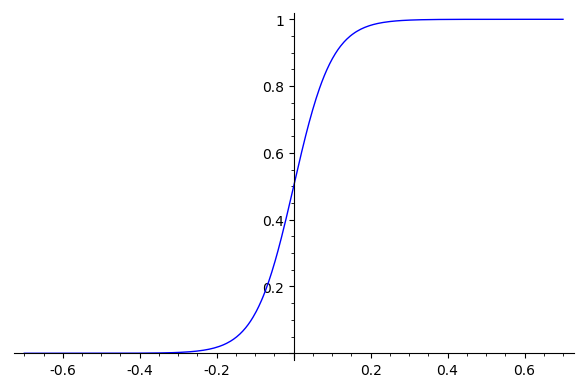

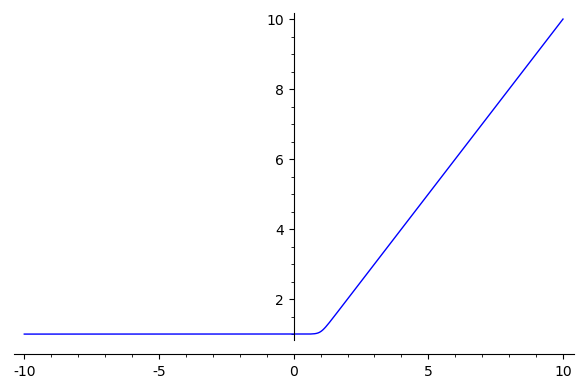

In [14]:
from sage.symbolic.integration.integral import definite_integral

wx = var('wx')
wy = var('wy')
wz = var('wz')
worldPos = (wx, wy, wz)

px = var('px')
py = var('py')
pz = var('px')
pos = (px, py, pz)

windowRad = 0.7
windowZ = -1

x = var('x')
y = var('y')

r = var('r')

s = 10; #var('s')

assume(wx >= -1)
assume(wx <= 1)
assume(wy >= -1)
assume(wy <= 1)
assume(wz > -1)
assume(wz <= 1)

assume(px >= -1)
assume(px <= 1)
assume(py >= -1)
assume(py <= 1)
assume(pz > wz)
assume(pz <= 1)

assume(x > -windowRad)
assume(x < windowRad)
assume(y > -windowRad)
assume(y < windowRad)

assume(r > 0)

def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

def cross(a, b):
    return (a[1]*b[2] - a[2]*b[1], a[2]*b[0] - a[0]*b[2], a[0]*b[1] - a[1]*b[0])

# print('cross: ' + str(cross((1, 0, 0),(0, 0, 1))))

def lenghtSq(v):
    return dot(v, v)

def lenght(v):
    return sqrt(lenghtSq(v))

def normalize(v):
    l = lenght(v);
    return (v[0]/l, v[1]/l, v[2]/l)

def step(x):
    #return (arctan(x)+pi/2)/pi
    return 1 / (1 + exp(-2*x*s))

def softmax(x, y):
    scale = 0.1
    return log(exp(x/scale) + exp(y/scale))*scale

def softmin(x, y):
    return -log(exp(-x) + exp(-y))

d = (x-wx, y-wy, windowZ-wz)
dnorm = normalize(d)
dp = (px-wx, py-wy, pz-wz)
dpnorm = normalize(dp)
integrand = step(dot(dnorm, dpnorm) - cos(r)).simplify_full()
# print("integrand: " + str(integrand))

# innerIntegral = definite_integral(integrand, x, windowRad, -windowRad)
# print("inner integral: " + strs(innerIntegral))
# result = definite_integral(innerIntegral, y, -windowRad, windowRad)

# print("result: " + str(result.simplify_full()))

X = var('X')
assume(X < r)
assume(X > -r)
theta = acos(-x)
areaUnder = definite_integral(2*sqrt(r^2-x^2), x, -r, X).simplify_full()
print("area under: " + str(areaUnder))

print(areaUnder(r))

plot(step(x), (x, -windowRad, windowRad)).show()
plot(softmax(x, 1), (x, -10, 10)).show()


